In [28]:
#importing the common libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/content/ab_data.csv')

In [3]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0.0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0.0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0.0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0.0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1.0


In [4]:
df['group'].unique()

array(['control', 'treatment', nan], dtype=object)

In [5]:
df.shape[0]

116503

H0= There is no significant difference in conversion between the old page and new page.

H1= There is a significant difference in conversion between the old page and the new page

# **Checking for mismatches**

This is to filter all users who were in the treatment group that didn't see the new landing page and the users in the control group that saw the new page

In [6]:
df[(df['group'] == 'treatment') & (df['landing_page'] != 'new_page')]

,user_id,timestamp,group,landing_page,converted
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0.0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0.0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0.0
685,666385,2017-01-23 08:11:54.823806,treatment,old_page,0.0
713,748761,2017-01-10 15:47:44.445196,treatment,old_page,0.0
...,...,...,...,...,...
115768,742310,2017-01-07 01:09:54.215773,treatment,old_page,0.0
116078,685329,2017-01-03 20:32:39.857984,treatment,old_page,1.0
116177,847067,2017-01-21 06:12:11.362002,treatment,old_page,1.0
116390,792604,2017-01-22 16:52:05.569641,treatment,old_page,0.0


In [7]:
df[(df['group'] == 'control') & (df['landing_page'] != 'old_page')]

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0.0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0.0
490,808613,2017-01-10 21:44:01.292755,control,new_page,0.0
846,637639,2017-01-11 23:09:52.682329,control,new_page,1.0
850,793580,2017-01-08 03:25:33.723712,control,new_page,1.0
...,...,...,...,...,...
116061,870284,2017-01-13 01:21:33.141814,control,new_page,1.0
116103,726922,2017-01-03 18:46:39.774262,control,new_page,0.0
116238,899277,2017-01-23 01:57:33.676962,control,new_page,0.0
116286,682896,2017-01-03 06:42:15.038949,control,new_page,0.0


Seeing as there is a lot of mismatch, it will be best to get the data with the right groups

In [8]:
new_df = df[((df['group'] == 'treatment') & (df['landing_page'] == 'new_page')) |
        ((df['group'] == 'control') & (df['landing_page'] == 'old_page'))]

In [9]:
new_df

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0.0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0.0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0.0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0.0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1.0
...,...,...,...,...,...
116497,871649,2017-01-10 03:24:26.929746,treatment,new_page,1.0
116498,835075,2017-01-17 21:54:57.392138,treatment,new_page,0.0
116499,791372,2017-01-08 03:04:13.966500,treatment,new_page,0.0
116500,784655,2017-01-17 19:14:47.160901,control,old_page,0.0


**Checking for Group distribution**

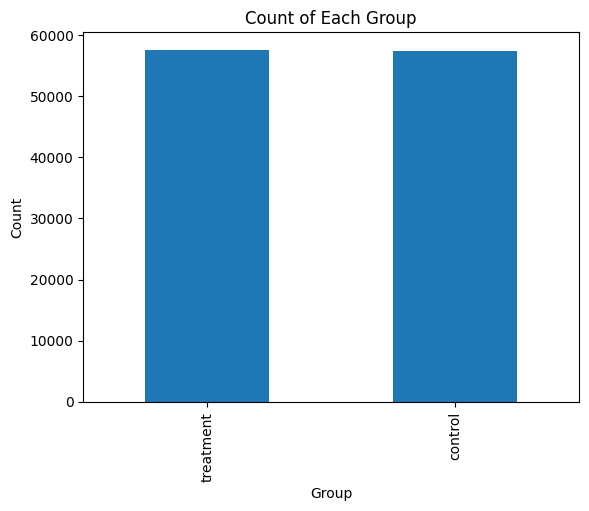

In [29]:
new_df['group'].value_counts().plot(kind='bar')

plt.xlabel('Group')
plt.ylabel('Count')
plt.title('Count of Each Group')

plt.show()

Chart doesn't really tell me the values

In [30]:
new_df['group'].value_counts()

,count
group,
treatment,57566
control,57324


The sample distribution seems fair

**Conversion Rates**

In [12]:
control_group_convert=new_df[(new_df['group']=='control') & (new_df['converted']==1)]

In [13]:
conversion_control=len(control_group_convert)/len(new_df[(new_df['group']=='control')])

In [14]:
conversion_control

0.11982764636103552

In [15]:
treatment_group_convert=new_df[(new_df['group']=='treatment') & (new_df['converted']==1)]

In [16]:
conversion_treatment=len(treatment_group_convert)/len(new_df[(new_df['group']=='treatment')])
conversion_treatment

0.11894173644164958

In [17]:
from statsmodels.stats.proportion import proportions_ztest

In [18]:
convert_control = new_df[new_df['group'] == 'control']['converted'].sum()
convert_treatment = new_df[new_df['group'] == 'treatment']['converted'].sum()



In [19]:
n_control = new_df[new_df['group'] == 'control'].shape[0]
n_treatment = new_df[new_df['group'] == 'treatment'].shape[0]

counts = [convert_control, convert_treatment]
nobs = [n_control, n_treatment]

z_stat, p_value = proportions_ztest(count=counts, nobs=nobs, alternative='two-sided')

print(f"Z-statistic: {z_stat:.5}")
print(f"P-value: {p_value:.5f}")



Z-statistic: 0.46306
P-value: 0.64332


Seeing as the p-value is greater than 0.05 and observed difference in conversion rates between treatment and control is only 0.38 standard errors away from 0 (i.e., almost no real difference) we fail to reject the null hypothesis

# Calculating the Confidence interval (95% Confidence Interval)

In [21]:
p_control = convert_control / n_control
p_treatment = convert_treatment / n_treatment

In [22]:
diff = p_treatment - p_control
se_diff = np.sqrt((p_control * (1 - p_control)) / n_control +
                  (p_treatment * (1 - p_treatment)) / n_treatment)

In [23]:
z_score=1.96 #zscore for 95% CI two tailed is 1.96
lower_bound = diff - (z_score * se_diff)
upper_bound = diff + (z_score * se_diff)

In [26]:
print(f"Difference in conversion rates: {diff:.4%}")
print(f"95% Confidence Interval: [{lower_bound:.4%}, {upper_bound:.4%}]")

Difference in conversion rates: -0.0886%
95% Confidence Interval: [-0.4636%, 0.2864%]


The new landing page showed a -0.0886% difference in conversion rate compared to the control. However, the 95% confidence interval ranges from -0.4636% to +0.2864%, which includes zero indicating the result is not statistically significant. Given the large boundary limit, we can't be certain about the experiment's outcome and require a larger sample to confirm if there is a true effect.